In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics.cluster import homogeneity_score


import warnings
warnings.filterwarnings("ignore")

In [5]:
downloaded = drive.CreateFile({'id': '1vF5VHRmSSoiN5hCmcgY6rGc-yxId0Q-W'}) # replace the id with id of file you want to access
downloaded.GetContentFile('full.csv') 

In [6]:
data = pd.read_csv('full.csv',header=None)
data.shape

(4898431, 42)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

In [9]:
data.dtypes

0       int64
1      object
2      object
3      object
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31      int64
32      int64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41     object
dtype: object

In [10]:
data[1].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [11]:
# filling column 1 with integer values
y=data[1].unique()
def rep_col1(x):
  for i in range (0,len(y)):
    if x == y[i]:
      return i

data[1] = data[1].apply(rep_col1)

data[1].unique()      


array([0, 1, 2])

In [12]:
data[2].unique()

array(['http', 'smtp', 'domain_u', 'auth', 'finger', 'telnet', 'eco_i',
       'ftp', 'ntp_u', 'ecr_i', 'other', 'urp_i', 'private', 'pop_3',
       'ftp_data', 'netstat', 'daytime', 'ssh', 'echo', 'time', 'name',
       'whois', 'domain', 'mtp', 'gopher', 'remote_job', 'rje', 'ctf',
       'supdup', 'link', 'systat', 'discard', 'X11', 'shell', 'login',
       'imap4', 'nntp', 'uucp', 'pm_dump', 'IRC', 'Z39_50', 'netbios_dgm',
       'ldap', 'sunrpc', 'courier', 'exec', 'bgp', 'csnet_ns', 'http_443',
       'klogin', 'printer', 'netbios_ssn', 'pop_2', 'nnsp', 'efs',
       'hostnames', 'uucp_path', 'sql_net', 'vmnet', 'iso_tsap',
       'netbios_ns', 'kshell', 'urh_i', 'http_2784', 'harvest', 'aol',
       'tftp_u', 'http_8001', 'tim_i', 'red_i'], dtype=object)

In [13]:
# filling column 2 with integer values
y=data[2].unique()
def rep_col2(x):
  for i in range (0,len(y)):
    if x == y[i]:
      return i

data[2] = data[2].apply(rep_col2)

data[2].unique()      


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69])

In [14]:
data[3].unique()

array(['SF', 'S2', 'S1', 'S3', 'OTH', 'REJ', 'RSTO', 'S0', 'RSTR',
       'RSTOS0', 'SH'], dtype=object)

In [15]:
# filling column 3 with integer values
y=data[3].unique()
def rep_col3(x):
  for i in range (0,len(y)):
    if x == y[i]:
      return i

data[3] = data[3].apply(rep_col3)

data[3].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [16]:
data[41].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [17]:
# filling column 41 with integer values
y=data[41].unique()
labels=y # saving for further use

def rep_col41(x):
  for i in range (0,len(y)):
    if x == y[i]:
      return i

data[41] = data[41].apply(rep_col41)

data[41].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [ ]:
data.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31      int64
32      int64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41      int64
dtype: object

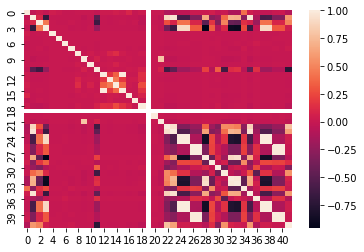

In [ ]:
# to find the correlation among the features (actual values shown in next cell)
sns.heatmap(data.corr())

In [ ]:
data.corr()  # Actual values of Correlation Coefficients

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,1.000000,-0.023601,0.026815,-0.014528,4.122055e-02,0.020392,-0.000160,-0.001012,3.765465e-03,0.004450,0.007412,-0.020624,0.027126,0.026378,0.052088,0.028718,0.095068,-0.000460,0.023524,NaN,-2.106206e-05,0.002389,-0.105074,-0.079863,-0.031098,-0.031110,0.016549,0.016836,0.021719,0.050286,-0.012754,0.010914,-0.117309,-0.119105,0.409009,0.042774,-0.008582,-0.030546,-0.030570,0.010569,0.016034,-0.091291
1,-0.023601,1.000000,0.092095,-0.684110,-1.236889e-03,-0.002108,-0.002980,-0.001815,-1.375359e-03,-0.033055,-0.005473,-0.510227,-0.002614,-0.010292,-0.005667,-0.004094,-0.011931,-0.010600,-0.035841,NaN,-7.964095e-04,-0.036034,0.888748,0.968113,-0.580819,-0.580508,-0.309450,-0.309264,0.665188,-0.279851,-0.199063,0.386409,0.716220,0.700951,-0.265723,0.959302,-0.119249,-0.581200,-0.580131,-0.311607,-0.311136,0.584219
2,0.026815,0.092095,1.000000,0.438051,8.429564e-04,-0.001175,-0.002210,0.009654,-3.065992e-04,-0.012630,-0.002817,-0.641751,-0.001646,-0.010254,-0.003704,-0.000108,-0.006251,0.008037,-0.043974,NaN,-4.659491e-04,-0.009389,0.276712,0.090015,0.415835,0.415300,0.093387,0.092672,-0.475146,0.167279,-0.304805,0.499174,-0.420416,-0.455402,0.148853,0.069435,-0.195349,0.415760,0.416163,0.090394,0.093901,0.491400
3,-0.014528,-0.684110,0.438051,1.000000,1.904510e-03,0.000982,0.004653,-0.008310,-6.056785e-04,-0.014141,0.001338,-0.223381,-0.000957,-0.003916,-0.001793,-0.001619,-0.004618,-0.004668,-0.015663,NaN,-1.229654e-04,-0.015725,-0.394247,-0.635532,0.905507,0.905229,0.315727,0.313139,-0.954456,0.337082,-0.079303,0.112096,-0.887217,-0.902834,0.255706,-0.666517,-0.009797,0.905091,0.905175,0.309482,0.308411,0.046248
4,0.041221,-0.001237,0.000843,0.001905,1.000000e+00,0.000239,-0.000005,-0.000027,-8.677487e-08,0.000782,-0.000007,0.000200,0.000005,-0.000006,-0.000004,-0.000002,0.000037,0.000022,-0.000022,NaN,-1.084695e-06,-0.000036,-0.001663,-0.001151,-0.000586,-0.000632,0.003210,0.003287,0.000670,0.000329,-0.000142,-0.002416,-0.001715,-0.001548,0.000719,-0.000793,0.000005,-0.000821,-0.000635,-0.000154,0.002927,0.002740
5,0.020392,-0.002108,-0.001175,0.000982,2.393376e-04,1.000000,-0.000004,-0.000026,1.645208e-04,0.000126,0.000632,0.002119,0.001307,0.000988,0.001204,0.001303,0.000256,-0.000011,0.000352,NaN,4.213097e-06,0.000035,-0.002646,-0.001998,-0.000774,-0.000773,0.002463,0.002467,0.000910,-0.000393,0.000311,-0.001534,-0.001067,-0.000968,0.003307,-0.000558,0.000346,-0.000765,-0.000763,0.002502,0.002512,0.000018
6,-0.000160,-0.002980,-0.002210,0.004653,-4.659182e-06,-0.000004,1.000000,-0.000036,-2.638263e-06,-0.000063,-0.000010,-0.000979,-0.000005,-0.000020,-0.000011,-0.000008,-0.000023,-0.000020,-0.000069,NaN,-1.527701e-06,-0.000069,-0.003735,-0.002852,0.004997,0.005141,-0.000347,-0.000593,0.000926,0.000503,0.013491,-0.008610,-0.004174,0.000865,-0.000236,0.001479,0.033193,0.004648,0.003096,-0.000552,-0.000597,0.004985
7,-0.001012,-0.001815,0.009654,-0.008310,-2.714937e-05,-0.000026,-0.000036,1.000000,-1.670585e-05,-0.000402,-0.000066,-0.006197,-0.000032,-0.000125,-0.000069,-0.000050,-0.000145,-0.000129,-0.000435,NaN,-9.673614e-06,-0.000438,-0.019948,-0.015326,-0.004469,-0.007051,-0.003663,-0.003756,0.005574,-0.002267,0.000128,-0.001786,-0.018699,-0.017398,0.022974,-0.010194,0.003998,-0.006090,-0.007047,0.009444,-0.003779,0.029184
8,0.003765,-0.001375,-0.000307,-0.000606,-8.677487e-08,0.000165,-0.000003,-0.000017,1.000000e+00,0.003591,0.031005,0.002534,0.017680,0.089084,0.133023,0.030985,0.012065,0.003229,0.023872,NaN,-7.051035e-07,-0.000032,-0.001738,-0.001320,-0.000514,-0.000514,-0.000274,-0.000274,0.000596,-0.000283,-0.000222,-0.002786,-0.001897,-0.001549,0.001864,-0.001047,0.002508,-0.000420,-0.000514,-0.000277,-0.000275,-0.001240
9,0.004450,-0.033055,-0.012630,-0.014141,7.822053e-04,0.000126,-0.000063,-0.000402,3.590666e-03,1.000000,0.004475,0.064579,0.002688,0.017916,0.001926,0.002014,0.019887,0.001717,0.00058

In [18]:

x = data.drop([41], axis=1)
y = data[41]

In [19]:
print(x.shape)
print(y.shape)

(4898431, 41)
(4898431,)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101) #train:test =70:30

## **Decision Tree**

In [21]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

Using gini as splitting metric

In [ ]:
#creating the decision tree function
dtree_model = DecisionTreeClassifier(random_state=30)

In [ ]:
#fitting the model
dtree_model.fit(x_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

In [ ]:
#checking the score on train data
print('Score on train data: ',dtree_model.score(x_train, y_train))


Score on train data:  0.9999976668909367


In [ ]:
#predictions on test data
pred=dtree_model.predict(x_test)
pred

array([ 5, 15,  0, ...,  4,  9,  5])

In [ ]:
print('Precision on test data:', precision_score(y_test, pred,average='weighted'))
print('Recall on test data:', recall_score(y_test, pred,average='weighted'))
print('f1_score on test data: ', f1_score(y_test,pred,average='weighted'))
print('Accuracy on test data: ', accuracy_score(y_test,pred))


Precision on test data 0.9999160412956353
Recall on test data 0.9999224241764374
f1_score on test data:  0.9999188008756901
Accuracy on test data:  0.9999224241764374


Using entropy as splitting metric

In [22]:
#creating the decision tree function
dtree_model = DecisionTreeClassifier(random_state=30,criterion='entropy')

In [23]:
#fitting the model
dtree_model.fit(x_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

In [24]:
#checking the score on train data
print('Score on train data: ',dtree_model.score(x_train, y_train))

Score on train data:  0.9999976668909367


In [25]:
#predictions on test data
pred=dtree_model.predict(x_test)
pred

array([ 5, 15,  0, ...,  4,  9,  5])

In [26]:
print('Precision on test data:', precision_score(y_test, pred,average='weighted'))
print('Recall on test data:', recall_score(y_test, pred,average='weighted'))
print('f1_score on test data: ', f1_score(y_test,pred,average='weighted'))
print('Accuracy on test data: ', accuracy_score(y_test,pred))

Precision on test data: 0.9999358475108542
Recall on test data: 0.9999428388668485
f1_score on test data:  0.9999382876519682
Accuracy on test data:  0.9999428388668485


## **Predictions on test.csv**

In [54]:
downloaded = drive.CreateFile({'id': '1xHje8oB8mlPO4OIm9A_Y42kapWwAZrQY'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv') 

In [55]:
testdata = pd.read_csv('test.csv',header=None)
testdata.shape

(311029, 42)

In [56]:
del testdata[0] # deleting as this column just contains serial numbers

# After this, testdata[0] will not contain anything

In [57]:
testdata.shape

(311029, 41)

In [58]:
testdata.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.11,0.12,0.13,0.14,0.15,0.16,1,1.1,0.0,0.00.1,0.00.2,0.00.3,1.0,0.00.4,0.00.5,255,254,1.00.1,0.01,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [59]:
testdata.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

In [60]:
testdata.dtypes

1       int64
2      object
3      object
4      object
5       int64
6       int64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23      int64
24    float64
25    float64
26     object
27     object
28     object
29    float64
30     object
31     object
32      int64
33      int64
34     object
35    float64
36     object
37     object
38     object
39     object
40     object
41     object
dtype: object

In [61]:
testdata[2].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [62]:
# filling column 2 with integer values
y=testdata[2].unique()
def enc_col2(x):
  for i in range (0,len(y)):
    if x == y[i]:
      return i

testdata[2] = testdata[2].apply(enc_col2)

testdata[2].unique() 

array([0, 1, 2])

In [63]:
testdata[3].unique()

array(['private', 'domain_u', 'http', 'smtp', 'ftp_data', 'ftp', 'eco_i',
       'other', 'auth', 'ecr_i', 'IRC', 'X11', 'finger', 'time', 'domain',
       'telnet', 'pop_3', 'ldap', 'login', 'name', 'ntp_u', 'http_443',
       'sunrpc', 'printer', 'systat', 'tim_i', 'netstat', 'remote_job',
       'link', 'urp_i', 'sql_net', 'bgp', 'pop_2', 'tftp_u', 'uucp',
       'imap4', 'pm_dump', 'nnsp', 'courier', 'daytime', 'iso_tsap',
       'echo', 'discard', 'ssh', 'whois', 'mtp', 'gopher', 'rje', 'ctf',
       'supdup', 'hostnames', 'csnet_ns', 'uucp_path', 'nntp',
       'netbios_ns', 'netbios_dgm', 'netbios_ssn', 'vmnet', 'Z39_50',
       'exec', 'shell', 'efs', 'klogin', 'kshell', 'icmp'], dtype=object)

In [64]:
# filling column 3 with integer values
y=testdata[3].unique()
def enc_col3(x):
  for i in range (0,len(y)):
    if x == y[i]:
      return i

testdata[3] = testdata[3].apply(enc_col3)

testdata[3].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [65]:
testdata[4].unique()

array(['SF', 'RSTR', 'S1', 'REJ', 'S3', 'RSTO', 'S0', 'S2', 'RSTOS0',
       'SH', 'OTH'], dtype=object)

In [66]:
# filling column 4 with integer values
y=testdata[4].unique()
def enc_col4(x):
  for i in range (0,len(y)):
    if x == y[i]:
      return i

testdata[4] = testdata[4].apply(enc_col4)

testdata[4].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Now, 0th row of some columns contain double decimal values. Let's replace them by single decimal

In [67]:
lis=[26,27,28,30,31,34,36,37,38,39,40,41]

In [68]:
import re
for i in lis:
  temp=re.split('\.',testdata[i][0])
  testdata[i][0]=temp[0]+'.'+temp[1]
  testdata[i]=testdata[i].astype(float)

In [69]:
testdata.dtypes

1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23      int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32      int64
33      int64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
dtype: object

In [84]:
#predictions on test.csv
testpred=dtree_model.predict(testdata) #this is the decision tree considering 'entropy' as splitting metric
testpred

array([0, 0, 0, ..., 0, 0, 0])

In [85]:

finalpred=[]  # for putting actual values of predicted labels
for i in range(0,len(testpred)):
  for j in range(0,len(labels)):
    if testpred[i]==j:
      finalpred.append(labels[j])
      break

In [89]:
lis=[]
for i in range(0,len(finalpred)):
  temp=[]
  temp.append(i)
  temp.append(finalpred[i])
  lis.append(temp)

In [94]:
pred_df = pd.DataFrame(lis, columns = ['index', 'target'])

In [96]:
pred_df.head()

,index,target
0,0,normal.
1,1,normal.
2,2,normal.
3,3,normal.
4,4,normal.


In [99]:
# saving the dataframe as csv file
pred_df.to_csv('testLabel.csv',index=False)

In [100]:
from google.colab import files
files.download('testLabel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>